In [1]:
%matplotlib inline

import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from PIL import Image

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation,Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical, normalize

2022-04-26 14:18:05.733479: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-26 14:18:05.733510: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Setting up the DIR paths 

In [2]:
ROOT_DIR = r"../data/"

NO_TUMOR_IMAGES = os.listdir(ROOT_DIR + 'no/')
YES_TUMOR_IMAGES = os.listdir(ROOT_DIR + 'yes/')

dataset = []
# 0 : no Tumor   1: Tumor
label = []

INPUT_SIZE = 64
print(len(NO_TUMOR_IMAGES))

1500


## Loading our custom image data to an array

In [4]:
image = cv2.imread("/mnt/sda2/Final_year_project/btd_final_project/data/yes/y2.jpg")
image = Image.fromarray(image,'RGB')

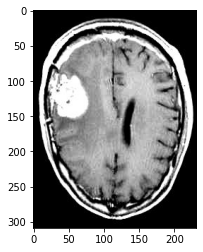

In [6]:
plt.imshow(image)

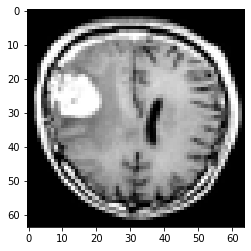

In [7]:
image=image.resize((INPUT_SIZE,INPUT_SIZE))
plt.imshow(image)

In [8]:
x_train,x_test,y_train,y_test = train_test_split(dataset,label,test_size=0.2,random_state=0)

In [9]:
model = Sequential()

# 1st layer
model.add(Conv2D(32,(3,3),input_shape = (INPUT_SIZE,INPUT_SIZE,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# 2nd Conv Layer
model.add(Conv2D(32,(3,3),kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# 3rd Conv Layer
model.add(Conv2D(32,(3,3),kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# # 4th conv2D layer
model.add(Conv2D(32,(3,3),kernel_initializer='he_uniform'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


# Flattening Layer for the Fully connected layer
model.add(Flatten())

# Dense Layer
model.add(Dense(INPUT_SIZE))
model.add(Activation('relu'))

# Dropout layer\
model.add(Dropout(0.5))

# Final Output layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

2022-04-26 14:29:19.791900: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/suman/.pyenv/versions/3.9.5/envs/machineLearningENV/lib/python3.9/site-packages/cv2/../../lib64:
2022-04-26 14:29:19.791940: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-26 14:29:19.791963: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (machine): /proc/driver/nvidia/version does not exist
2022-04-26 14:29:19.792874: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler f

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 activation (Activation)     (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 29, 29, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                    

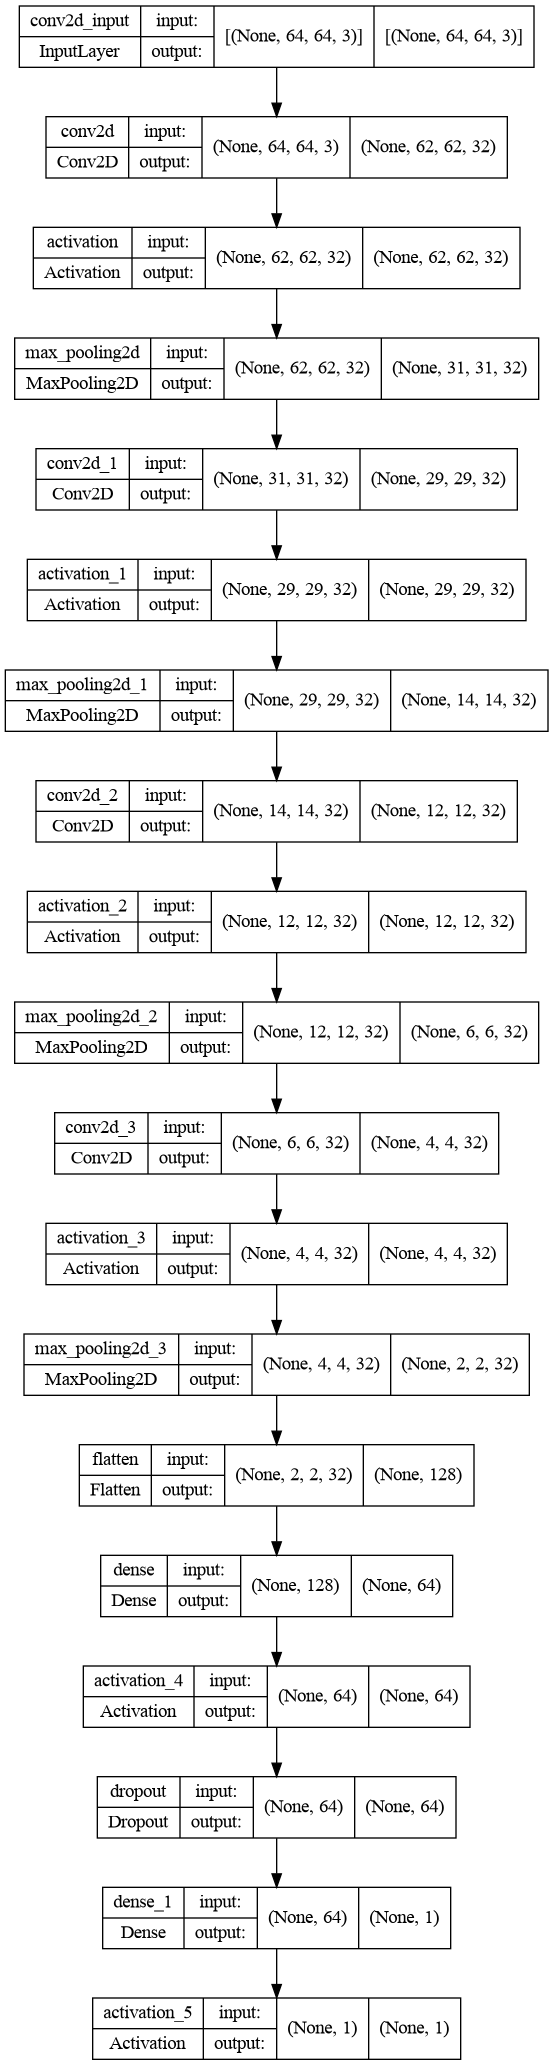

In [10]:
tf.keras.utils.plot_model(
    model,
    to_file='cnn_model.png',
    show_shapes=True,
    expand_nested=True
)